In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
import pickle
import gzip


In [7]:
def GetAccuracy(VAL_TEST_OUT_PRED,ValDataAct):
    accuracy = 0.0
    counter = 0
    
    VAL_TEST_OUT = VAL_TEST_OUT_PRED.argmax(axis=0).T
#     print(VAL_TEST_OUT.shape)
    
    for i in range (0,len(VAL_TEST_OUT)):
        if(int(VAL_TEST_OUT[i]) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return accuracy



In [12]:
# this sigmoid function return values from 0 to 1 as well as added the linearity
# in the logistic regression model

def softmax(z):
    
    numerator = np.exp (z)
#     print(numerator.shape)
    demominator =  np.exp(z).sum(axis=0)
#     print(demominator.shape)
    
    return numerator/demominator

In [27]:
def execute_logistic_regression(_loop_range, no_of_classes, _TrainingTarget, _TrainingData, 
                                _ValDataAct, _ValData, _TestDataAct, _TestData, mini_batch=32):
    no_of_samples = _TrainingData.shape[0]
    no_of_features = _TrainingData.shape[1]
    W = np.ones([no_of_features, no_of_classes])
    W_NOW = np.transpose(W)
    learning_rate = 0.05
    
    L_Acc_Val   = []
    L_Acc_TR    = []
    L_Acc_Test  = []
    
    _TrainingTargetVector =  (np.arange(np.max(_TrainingTarget) + 1) == _TrainingTarget[:, None]).astype(float)
    
    _loop_range = min(_loop_range, (int) (no_of_samples/mini_batch))
    

    for i in range(_loop_range):
        
        lowerbound = i*mini_batch
        upperbound = min(no_of_samples, (i+1)*mini_batch)
        
        _thisTrainData = _TrainingData[lowerbound:upperbound].T
        


        z = np.dot(W_NOW, _thisTrainData)
        predicted_values = softmax(z).T
            

        diff = np.subtract(predicted_values, _TrainingTargetVector[lowerbound:upperbound])
        
        
        _thisTrainData = _thisTrainData.reshape(no_of_features, mini_batch)
        diff = diff.reshape(mini_batch, no_of_classes)
        
        Delta_W = np.dot(_thisTrainData, diff)

        W_NOW = W_NOW - (learning_rate*Delta_W.T)

        #-----------------TrainingData Accuracy---------------------#
        TR_TEST_OUT   = softmax(np.dot(W_NOW, _TrainingData.T))
        L_Acc_TR.append(GetAccuracy(TR_TEST_OUT, _TrainingTarget))

        #-----------------ValidationData Accuracy---------------------#
        VAL_TEST_OUT  = softmax(np.dot(W_NOW, _ValData))
        L_Acc_Val.append(GetAccuracy(VAL_TEST_OUT, _ValDataAct))

        #-----------------TestingData Accuracy---------------------#
        TEST_OUT      = softmax(np.dot(W_NOW, _TestData))
        L_Acc_Test.append(GetAccuracy(TEST_OUT, _TestDataAct))

    print ('----------Softmax Regression With Mini-Batch SGD --------------------')
    print ("Accuracy Training   = " + str(np.around(max(L_Acc_TR),5)))
    print ("Accuracy Validation = " + str(np.around(max(L_Acc_Val),5)))
    print ("Accuracy Testing    = " + str(np.around(max(L_Acc_Test),5)))
    
    plt.figure(figsize=[12, 4])
    plt.plot(np.arange(_loop_range), L_Acc_TR, marker='.')
    plt.plot(np.arange(_loop_range), L_Acc_Val, marker='.')
    plt.plot(np.arange(_loop_range), L_Acc_Test, marker='.')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.show()

# MINST DATA

In [28]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
__training_data, __validation_data, __test_data = pickle.load(f, encoding='latin1')
f.close()

TrainingData = __training_data[0]
TrainingTarget = __training_data[1]

ValidationData = __validation_data[0]
ValidationTarget = __validation_data[1]

TestingData = __test_data[0]
TestingTarget = __test_data[1]


print("=========================")
print("== MNIST Dataset ==")
print("=========================")
print("TrainingData : " + str(TrainingData.shape))
print("TrainingTarget : " + str(TrainingTarget.shape))
print("ValidationData : " + str(ValidationData.shape))
print("ValidationTarget : " + str(ValidationTarget.shape))
print("TestingData : " + str(TestingData.shape))
print("TestingTarget : " + str(TestingTarget.shape))

== MNIST Dataset ==
TrainingData : (50000, 784)
TrainingTarget : (50000,)
ValidationData : (10000, 784)
ValidationTarget : (10000,)
TestingData : (10000, 784)
TestingTarget : (10000,)


----------Softmax Regression With Mini-Batch SGD --------------------
Accuracy Training   = 90.256
Accuracy Validation = 90.88
Accuracy Testing    = 90.55


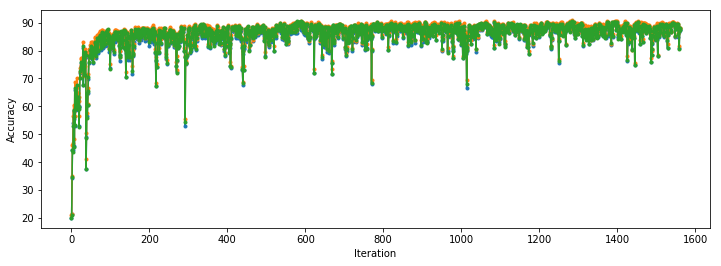

In [29]:
execute_logistic_regression(1600, 10, TrainingTarget, TrainingData, ValidationTarget, 
                            np.transpose(ValidationData), TestingTarget, np.transpose(TestingData))

